# Finding lines on Image 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 200

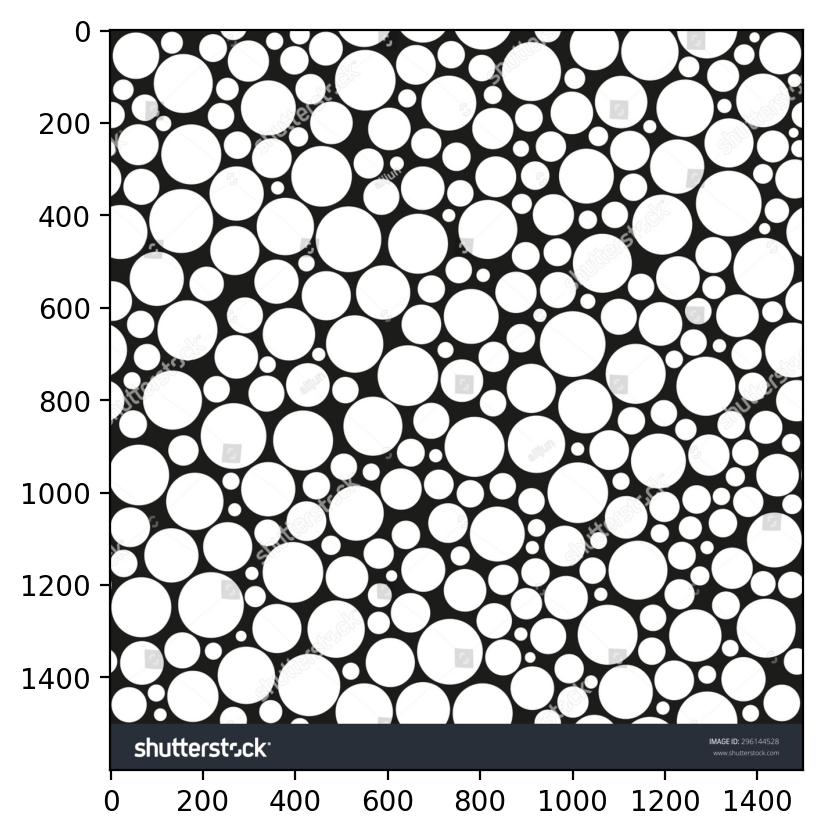

In [2]:
img = cv2.imread('img/circles.jpg')
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()

## GaussianBlur

In [3]:
# Convert image to grayscale
gray = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY)

In [4]:
kernel_size = 5
blured = cv2.GaussianBlur(gray, (kernel_size, kernel_size),0)

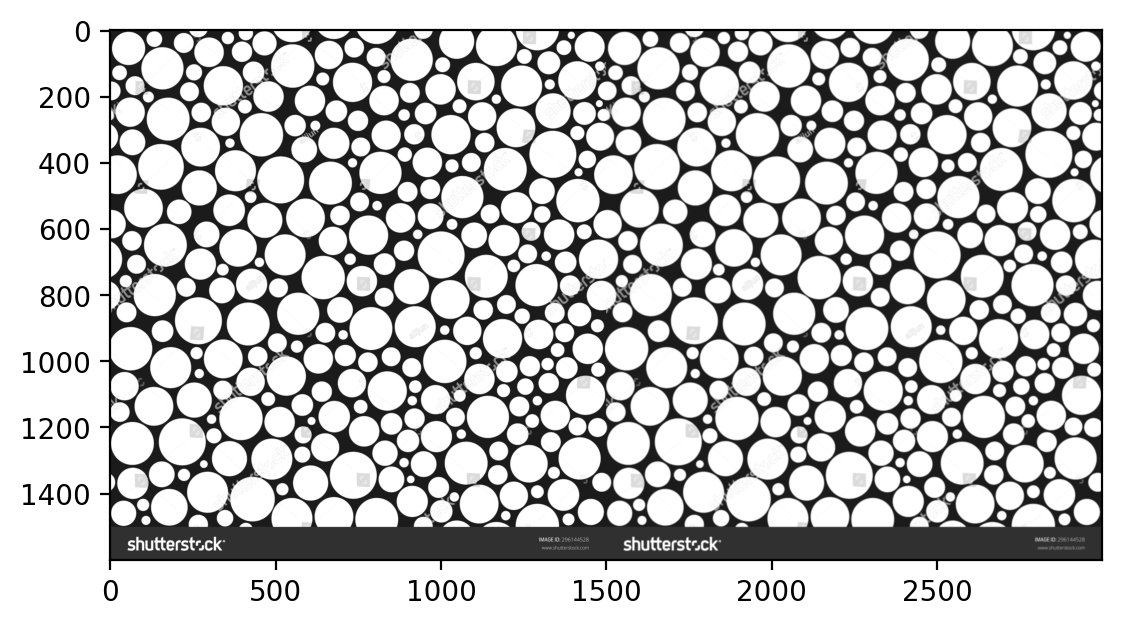

In [5]:
img12 = np.hstack((gray, blured))
plt.imshow(img12, cmap='gray')
plt.show()

In [6]:
# if the image was coolorfull I suspect this could help
# Convert to the HSV color space
#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Get binary mask
#msk = cv2.inRange(hsv, np.array([0, 0, 130]), np.array([179, 255, 255]))

## Hough Transform

In [7]:
# not need to run thresholding on the image before running Hough transform since Canny edge will run on it in any case.
# https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
# expalantion of the params can be found there.

In [8]:
minDist = 10
param1 = 30 #500
param2 = 60 #200 #smaller value-> more false circles
minRadius = 1
maxRadius = 200
circle_image = np.copy(im_rgb) * 0  # creating a blank to draw lines on

circles = cv2.HoughCircles(blured, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 2)

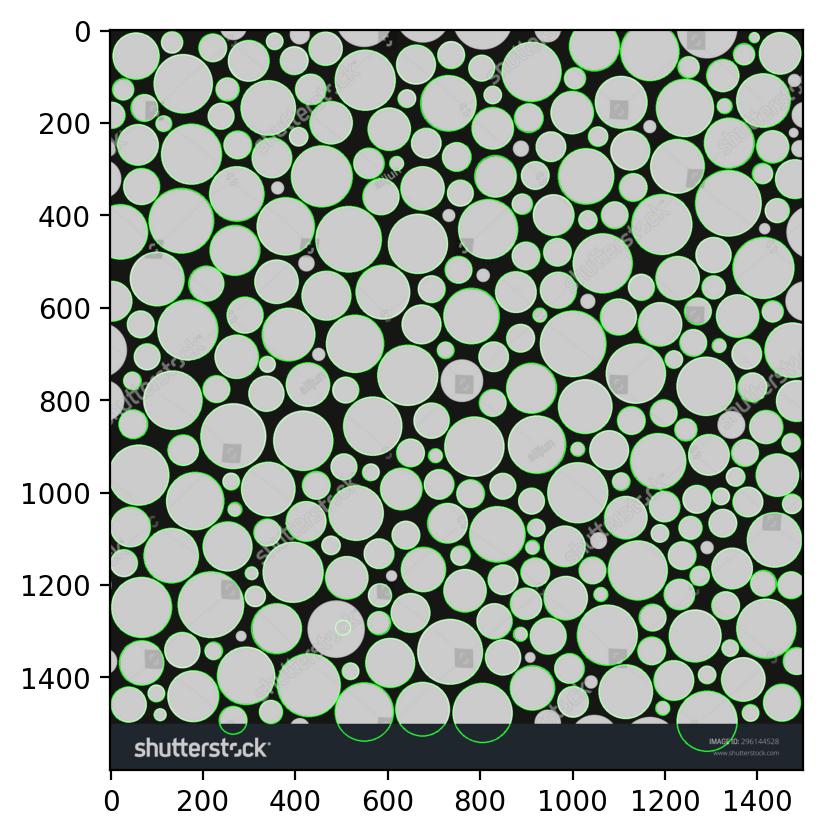

In [9]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(im_rgb, 0.8, circle_image, 1, 0)
plt.imshow(lines_edges)
plt.show()